In [4]:
# Importing necessary library
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
# Load datasets
california = fetch_california_housing()
X = california.data 
y = california.target

# Convert to Dataframe 
california_df = pd.DataFrame(data=np.c_[california['data'], california['target']],
                             columns=list(california['feature_names']) + ['PRICE'])

# display the first five row of the datasets
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# split the datasets into training sets 
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
# Standardize the features by scaling them 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# we'll use the Linear Regression Algorithm 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Lets predict 
y_pred = lr.predict(X_test)

In [17]:
# Analyze the performance of the model 
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{mse:.2f}")

# R- squared Scre
r2 = r2_score(y_test, y_pred)
print(f"R.squared Score: {r2:.2f}")

Mean Squared Error:0.56
R.squared Score: 0.58


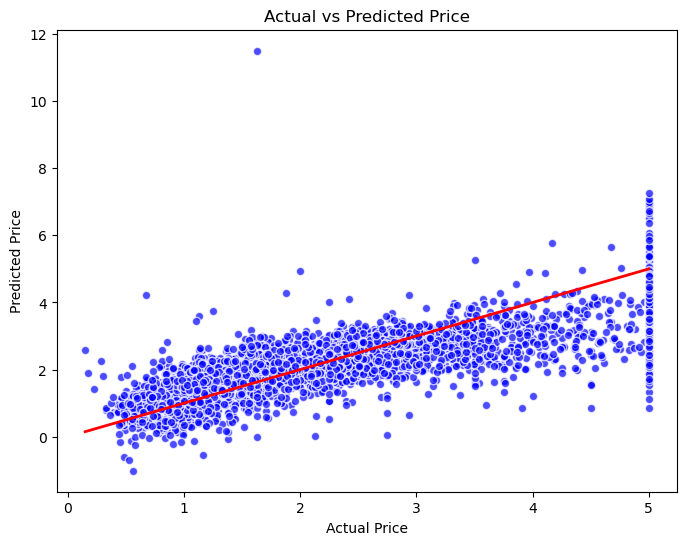

In [20]:
# visualize the actual vs predicted prices 
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color = 'blue', edgecolors='w', alpha=0.7)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()